# Практические методы поиска аномалий в данных

## Mounting a Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Datasets/customers.xlsx')

In [ ]:
data.head()

,Unnamed: 0,name_host,name_customer,gender,age,product,color,price,count,mark
0,0,РАО «Гришин»,Людмила,male,27,рубашка,Розовый,1882,2.0,5.0
1,1,ЗАО «Дементьева Стрелкова»,Радим,f,56,костюм,Индиго,7279,3.0,1.0
2,2,ОАО «Быков Семенов»,Ангелина,male,55,свитер,Сине-фиолетовый,912,1.0,3.0
3,3,ООО «Кулаков Русаков»,Демьян,male,54,куртка,Серый,12928,2.0,4.0
4,4,НМЖК,Глафира,male,50,NaN,Бледно-зеленый,7492,1.0,3.0


In [ ]:
data = data.drop('Unnamed: 0', axis=1)

In [ ]:
data.head()

,name_host,name_customer,gender,age,product,color,price,count,mark
0,РАО «Гришин»,Людмила,male,27,рубашка,Розовый,1882,2.0,5.0
1,ЗАО «Дементьева Стрелкова»,Радим,f,56,костюм,Индиго,7279,3.0,1.0
2,ОАО «Быков Семенов»,Ангелина,male,55,свитер,Сине-фиолетовый,912,1.0,3.0
3,ООО «Кулаков Русаков»,Демьян,male,54,куртка,Серый,12928,2.0,4.0
4,НМЖК,Глафира,male,50,NaN,Бледно-зеленый,7492,1.0,3.0


# Описание набора данных

Вариант 8. Набор данных о покупках в маркетплейсе (файл - customers.xls).

## Описание данных:

name_host - фирма продавец

name_customer - имя покупателя

gender - пол покупателя

age - возраст покупателя

product - название товара

color - цвет товара

price - стоимость товара

count - количество товара

mark - оценка товара


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name_host      2998 non-null   object 
 1   name_customer  2999 non-null   object 
 2   gender         3000 non-null   object 
 3   age            3000 non-null   object 
 4   product        2742 non-null   object 
 5   color          2999 non-null   object 
 6   price          3000 non-null   int64  
 7   count          2999 non-null   float64
 8   mark           2999 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 211.1+ KB


Видим, что в наборе данных присутствуют пропуски

In [ ]:
data.describe()

,price,count,mark
count,3000.000000,2999.000000,2999.000000
mean,7787.209000,2.517172,2.502167
std,4452.440241,54.767569,1.740287
min,-8366.000000,-2.000000,-3.000000
25%,3865.500000,1.000000,1.000000
50%,7591.500000,2.000000,3.000000
75%,11814.250000,3.000000,4.000000
max,15397.000000,3000.000000,5.000000


In [ ]:
data.describe(include='object')

,name_host,name_customer,gender,age,product,color
count,2998,2999,3000,3000,2742,2999
unique,2763,398,4,56,10,54
top,ЗАО «Белова-Сысоев»,Алевтина,female,23,юбка,Темно-синий
freq,11,15,1807,78,300,71


In [ ]:
data['age'] = pd.to_numeric(data['age'], errors='coerce')

In [ ]:
data['mark'].unique()

array([ 5.,  1.,  3.,  4.,  2.,  0., nan, -3.])

In [ ]:
data = data[(data['price'] > 0) & (data['count'] > 0) & (data['mark'] >= 0)]

In [ ]:
data = data.dropna()

In [ ]:
data['age'] = data['age'].astype(int)
data['count'] = data['count'].astype(int)
data['mark'] = data['mark'].astype(int)

In [ ]:
# Вычисляем моду для столбцов "count" и "mark"
count_mode = data['count'].mode()[0]
mark_mode = data['mark'].mode()[0]

# Заполняем пропуски модой
data['count'] = data['count'].fillna(count_mode)
data['mark'] = data['mark'].fillna(mark_mode)

In [ ]:
data = data[data['age'] < 100]

In [ ]:
data.head()

,name_host,name_customer,gender,age,product,color,price,count,mark
0,РАО «Гришин»,Людмила,male,27,рубашка,Розовый,1882,2,5
1,ЗАО «Дементьева Стрелкова»,Радим,f,56,костюм,Индиго,7279,3,1
2,ОАО «Быков Семенов»,Ангелина,male,55,свитер,Сине-фиолетовый,912,1,3
3,ООО «Кулаков Русаков»,Демьян,male,54,куртка,Серый,12928,2,4
5,ИП «Быкова Волков»,Афанасий,female,48,шарф,Малиновый,4350,1,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2053 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name_host      2053 non-null   object
 1   name_customer  2053 non-null   object
 2   gender         2053 non-null   object
 3   age            2053 non-null   int64 
 4   product        2053 non-null   object
 5   color          2053 non-null   object
 6   price          2053 non-null   int64 
 7   count          2053 non-null   int64 
 8   mark           2053 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 160.4+ KB


Видим, что в данных пропусков больше нет

In [ ]:
data.describe()

,age,price,count,mark
count,2053.000000,2053.000000,2053.000000,2053.000000
mean,42.163176,7788.012177,3.482708,2.492937
std,14.491584,4414.680305,66.173758,1.728269
min,18.000000,352.000000,1.000000,0.000000
25%,30.000000,3891.000000,1.000000,1.000000
50%,42.000000,7583.000000,2.000000,3.000000
75%,55.000000,11754.000000,3.000000,4.000000
max,67.000000,15390.000000,3000.000000,5.000000


In [ ]:
data.describe(include='object')

,name_host,name_customer,gender,product,color
count,2053,2053,2053,2053,2053
unique,1933,396,3,10,54
top,ЗАО «Белова-Сысоев»,Лонгин,female,шапка,Ярко-розовый
freq,10,12,1228,221,48


In [ ]:
data['gender'].unique()

array(['male', 'f', 'female'], dtype=object)

In [ ]:
!pip install pymorphy2
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [ ]:
data['gender'] = data['name_customer'].apply(lambda x: morph.parse(x)[0].tag.gender)

In [ ]:
data['gender'].unique()

array(['femn', 'masc', None, 'neut'], dtype=object)

In [ ]:
data = data.query('gender != None and gender != "neut"')

In [ ]:
data['gender'] = data['gender'].replace({'femn': 'female', 'masc': 'male'})

In [ ]:
data = data.dropna()

In [ ]:
data[data['gender'] == 'male']

,name_host,name_customer,gender,age,product,color,price,count,mark
1,ЗАО «Дементьева Стрелкова»,Радим,male,56,костюм,Индиго,7279,3,1
3,ООО «Кулаков Русаков»,Демьян,male,54,куртка,Серый,12928,2,4
5,ИП «Быкова Волков»,Афанасий,male,48,шарф,Малиновый,4350,1,5
6,"ИП «Степанова, Одинцова и Бобылев»",Давыд,male,61,платье,Шоколадный,1484,1,1
7,ИП «Быкова Волков»,Ермолай,male,19,шапка,Фиолетовый,1133,30,2
...,...,...,...,...,...,...,...,...,...
2991,Квадра,Лаврентий,male,31,штаны,Розовато-лавандовый,1504,3,0
2992,Соловьева Лтд,Владилен,male,64,шарф,Ярко-розовый,11166,2,2
2993,"ИП «Петрова, Русаков и Крылова»",Борислав,male,44,куртка,Темный хаки,1346,1,2
2994,"РАО «Носова, Тетерина и Тарасов»",Александр,male,18,платье,Античный Белый,13864,1,4


In [ ]:
data[data['gender'] == 'female']

,name_host,name_customer,gender,age,product,color,price,count,mark
0,РАО «Гришин»,Людмила,female,27,рубашка,Розовый,1882,2,5
2,ОАО «Быков Семенов»,Ангелина,female,55,свитер,Сине-фиолетовый,912,1,3
12,ИП «Быкова Волков»,Прасковья,female,27,платье,Шоколадный,5377,1,2
32,ЗАО «Панфилова-Семенов»,Бажен,female,59,юбка,Каштановый,14646,3,1
33,"ЗАО «Елисеева, Филатова и Савина»",Раиса,female,21,куртка,Индиго,4061,1,0
...,...,...,...,...,...,...,...,...,...
2972,РАО «Евдокимов»,Милен,female,29,джинсы,Коричневый,3183,2,0
2975,ООО «Владимирова-Шилов»,Евфросиния,female,29,шапка,Светло-синий,11933,2,5
2976,ЗАО «Матвеева-Кузьмин»,Вера,female,58,юбка,Желто-зеленый,13642,2,4
2995,Сидорова Лимитед,Валентина,female,32,штаны,Темно-серый,9574,3,0


In [ ]:
data.head()

,name_host,name_customer,gender,age,product,color,price,count,mark
0,РАО «Гришин»,Людмила,female,27,рубашка,Розовый,1882,2,5
1,ЗАО «Дементьева Стрелкова»,Радим,male,56,костюм,Индиго,7279,3,1
2,ОАО «Быков Семенов»,Ангелина,female,55,свитер,Сине-фиолетовый,912,1,3
3,ООО «Кулаков Русаков»,Демьян,male,54,куртка,Серый,12928,2,4
5,ИП «Быкова Волков»,Афанасий,male,48,шарф,Малиновый,4350,1,5


In [ ]:
data.shape

(2038, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2038 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name_host      2038 non-null   object
 1   name_customer  2038 non-null   object
 2   gender         2038 non-null   object
 3   age            2038 non-null   int64 
 4   product        2038 non-null   object
 5   color          2038 non-null   object
 6   price          2038 non-null   int64 
 7   count          2038 non-null   int64 
 8   mark           2038 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 159.2+ KB


In [ ]:
data.describe()

,age,price,count,mark
count,2038.000000,2038.000000,2038.000000,2038.000000
mean,42.225711,7786.115800,3.493131,2.489205
std,14.464423,4415.861676,66.416817,1.725557
min,18.000000,352.000000,1.000000,0.000000
25%,30.000000,3890.250000,1.000000,1.000000
50%,42.000000,7575.500000,2.000000,2.000000
75%,55.000000,11757.000000,3.000000,4.000000
max,67.000000,15390.000000,3000.000000,5.000000


In [ ]:
data.describe(include='object')

,name_host,name_customer,gender,product,color
count,2038,2038,2038,2038,2038
unique,1919,393,2,10,54
top,ЗАО «Белова-Сысоев»,Лонгин,male,шапка,Ярко-розовый
freq,10,12,1601,219,48


# Exploratory Data Analysis

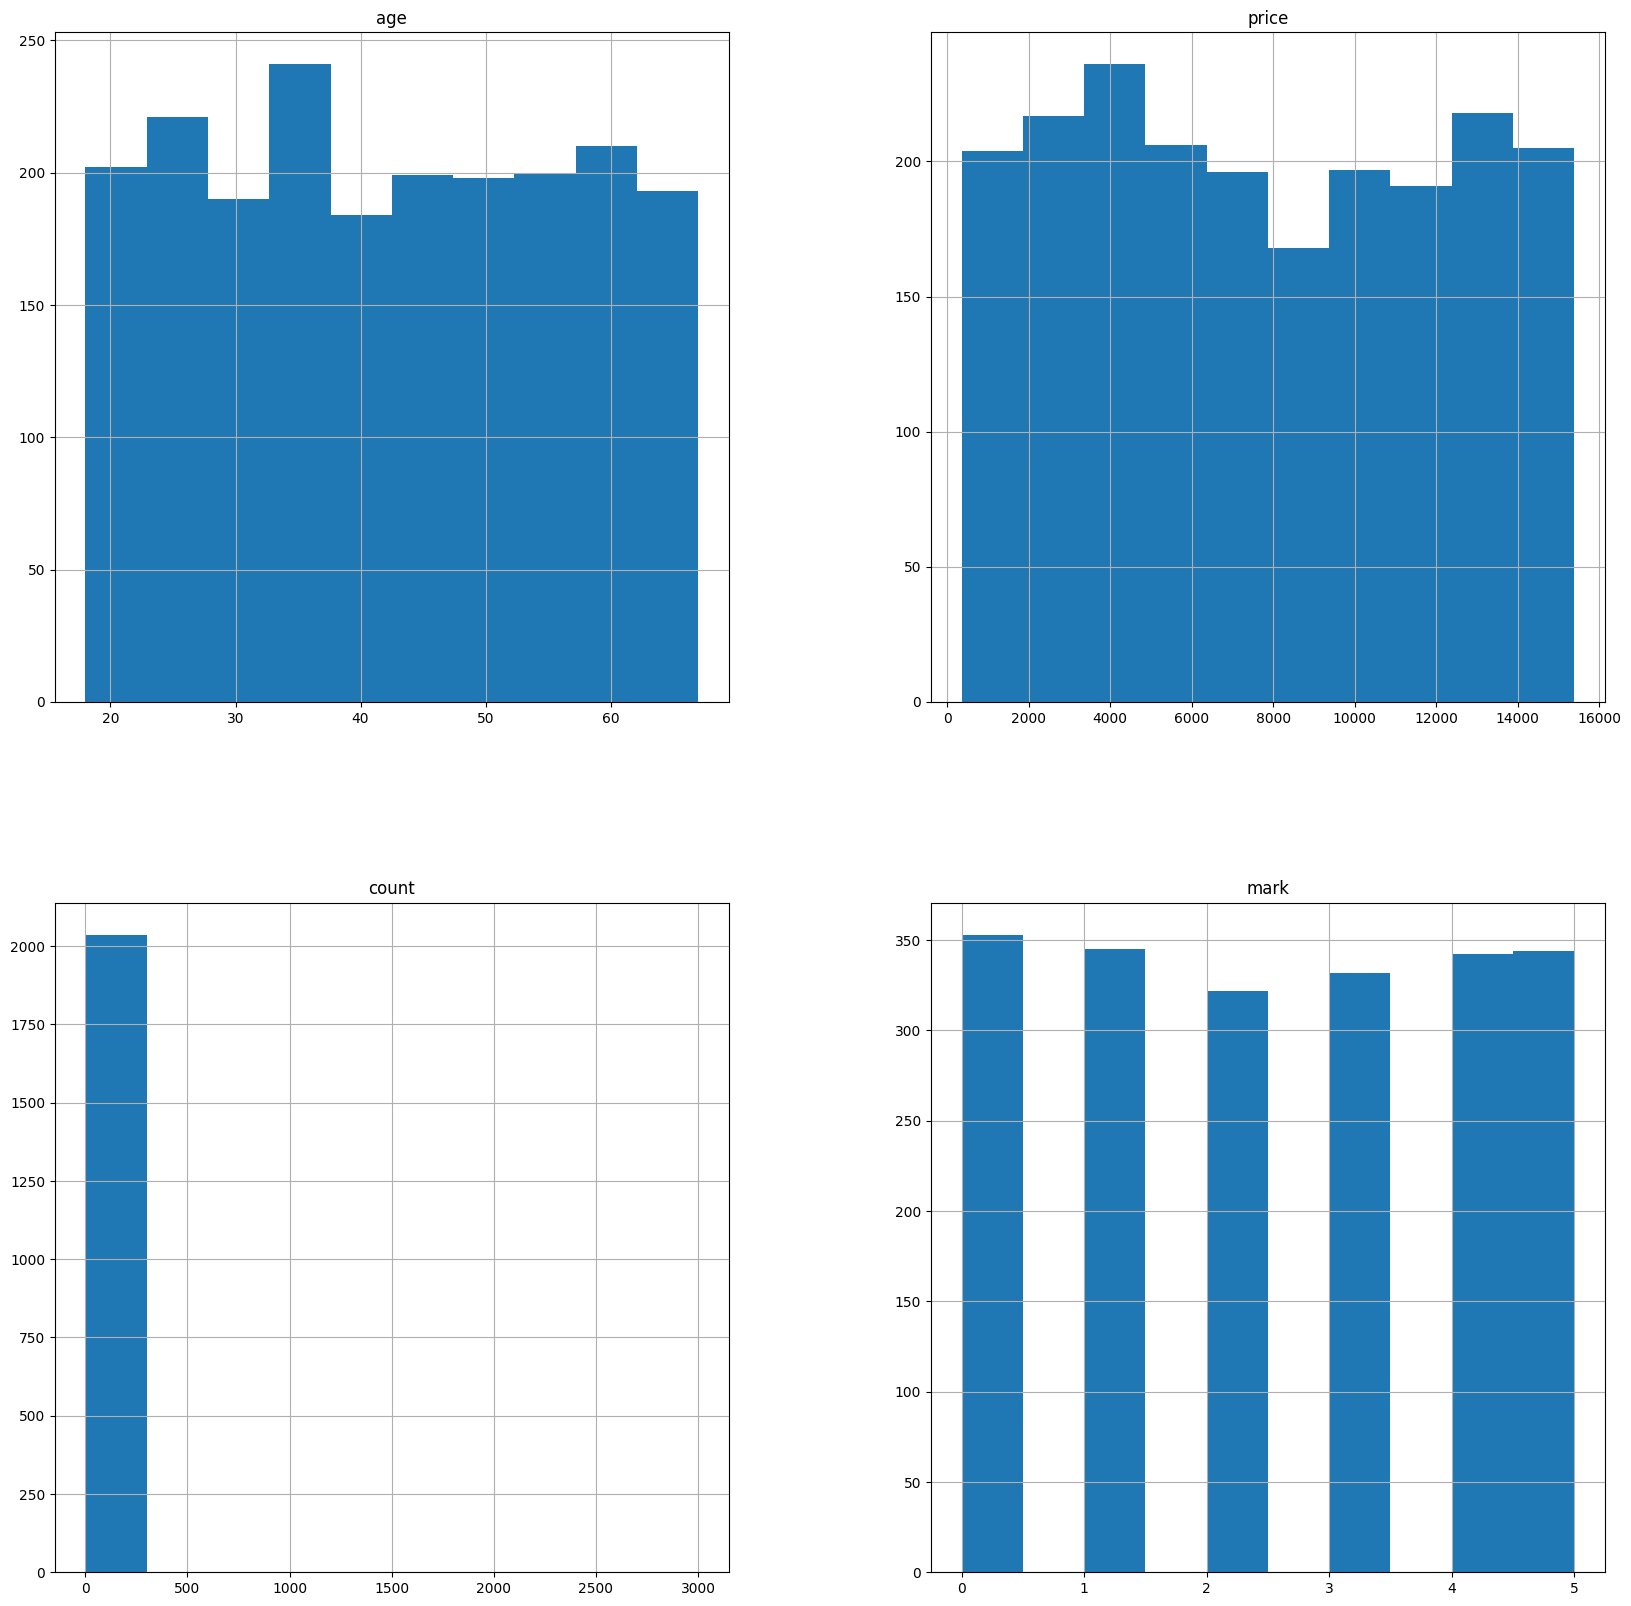

In [ ]:
data.hist(figsize=(20, 20));

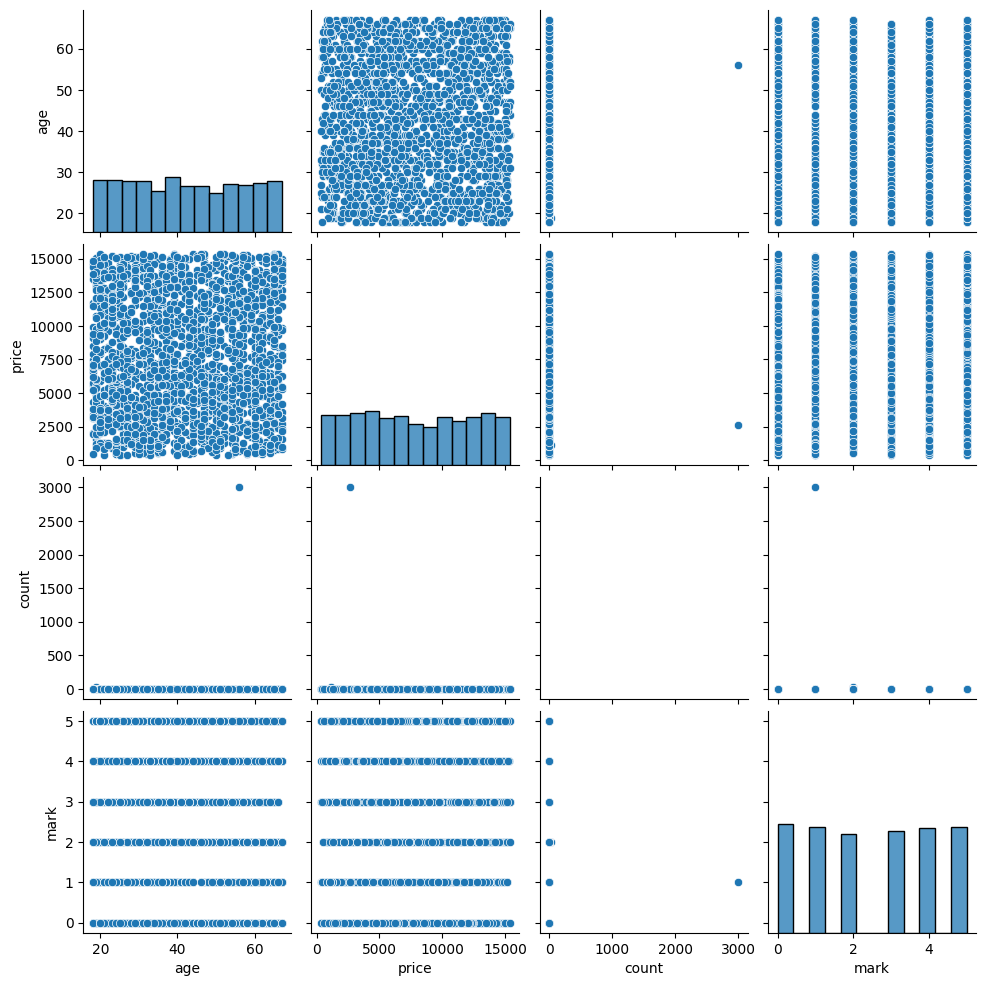

In [ ]:
sns.pairplot(data[['age', 'price',	'count',	'mark']])

In [ ]:
X = data.drop('mark', axis=1)

# Функция для обнаружения аномалий в данных

In [ ]:
from sklearn.base import BaseEstimator
from scipy.spatial.distance import cdist
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import DBSCAN
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest

class DistanceOutliers(BaseEstimator):
    """
    -----------
    Parameters:

    - metric: string, default - euclidean
        metric to use for distance calculation (see scipy.spatial.distance.cdist)

    - percentile: float in range [0, 100]
        hyperparameter which sets the threshold for anomalies
    """
    def __init__(self, metric='euclidean', percentile=90):
        self.metric = metric
        self.percentile = percentile

    def fit(self, X):
        self.centroid = np.mean(X, axis=0).reshape(-1, 1).T
        distances_train = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        self.threshold = np.percentile(distances_train, self.percentile)

    def predict(self, X):
        distances = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        predictions = (distances > self.threshold).astype(int)
        return predictions

def detect_anomalies(data, method='std', threshold=3, del_anomaly=False):
    def outlier_std(data, col, threshold=3):
        mean = data[col].mean()
        std = data[col].std()
        up_bound = mean + threshold * std
        low_bound = mean - threshold * std
        anomalies = pd.concat([data[col]>up_bound, data[col]<low_bound], axis=1).any(axis=1)
        return anomalies, up_bound, low_bound

    def outlier_iqr(data, col, threshold=1.5):
        IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
        up_bound = data[col].quantile(0.75) + (IQR * threshold)
        low_bound = data[col].quantile(0.25) - (IQR * threshold)
        anomalies = pd.concat([data[col]>up_bound, data[col]<low_bound], axis=1).any(axis=1)
        return anomalies, up_bound, low_bound

    method_dict = {'std': outlier_std, 'iqr': outlier_iqr}
    data_features = data.select_dtypes(include=['int64', 'float64'])

    if method not in method_dict:
        if method not in ['euclidean', 'cityblock', 'dbscan', 'oneclass_svm', 'isolation_forest']:
            raise ValueError("Invalid method. Choose either 'std', 'iqr', 'euclidean', 'cityblock', 'dbscan', 'oneclass_svm' or 'isolation_forest'.")

    outliers_indices = []
    if method in ['euclidean', 'cityblock']:
        scaled_data = RobustScaler().fit_transform(data_features)
        model = DistanceOutliers(metric=method, percentile=(100 - threshold))
        model.fit(scaled_data)
        anomalies = model.predict(scaled_data)
        outliers_indices.extend(list(np.where(anomalies == 1)[0]))
        outliers_indices = list(set(data.index) - set(outliers_indices))
    elif method == 'dbscan':
        scaled_data = RobustScaler().fit_transform(data_features)
        outlier_percentage = 1.
        num_clusters = []
        anomaly_percentage = []
        eps = 0.05
        eps_history = [eps]
        while outlier_percentage>0.1:
            model = DBSCAN(eps=eps).fit(scaled_data)
            labels = model.labels_
            num_clusters.append(len(np.unique(labels))-1)
            labels = np.array([1 if label == -1 else 0 for label in labels])
            outlier_percentage = sum(labels==1) / len(labels)
            eps += 0.05
            eps_history.append(eps)
            anomaly_percentage.append(outlier_percentage)
        outliers_indices.extend(list(np.where(labels == 1)[0]))

    elif method == 'oneclass_svm':
        original_indices = data.index  # Сохраняем исходные индексы
        scaled_data = RobustScaler().fit_transform(data_features)
        one_class_svm = OneClassSVM(nu=0.05, gamma='auto')
        one_class_svm.fit(scaled_data)
        svm_outliers = one_class_svm.predict(scaled_data)
        svm_outliers = np.array([1 if label == -1 else 0 for label in svm_outliers])
        outliers_indices.extend(list(original_indices[np.where(svm_outliers == 1)[0]]))

    elif method == 'isolation_forest':
        original_indices = data.index  # Сохраняем исходные индексы
        scaled_data = RobustScaler().fit_transform(data_features)
        isolation_forest = IsolationForest(n_estimators=100, contamination=0.05,
                                           max_features=1.0, bootstrap=True)
        isolation_forest.fit(scaled_data)
        isolation_outliers = isolation_forest.predict(scaled_data)
        isolation_outliers = np.array([1 if label == -1 else 0 for label in isolation_outliers])
        outliers_indices.extend(list(original_indices[np.where(isolation_outliers == 1)[0]]))  # Используем исходные индексы для аномалий


    else:
        for column in data_features.columns:
            anomalies, _, _ = method_dict[method](data_features, column, threshold=threshold)
            outliers_indices.extend(list(anomalies[anomalies].index))
        outliers_indices = list(set(outliers_indices))

    if del_anomaly:
        invalid_indices = set(outliers_indices) - set(data.index)
        valid_indices = [i for i in outliers_indices if i not in invalid_indices]
        clean_data = data.drop(valid_indices)
        return clean_data
    else:
        return outliers_indices

In [ ]:
# Выявление аномалий и удаление их из набора данных (метод 'std')
clean_data_std = detect_anomalies(X, method='std', threshold=3, del_anomaly=True)
print("Clean data (std):\n", clean_data_std, clean_data_std.shape)

# Выявление аномалий и получение их индексов (метод 'std')
anomaly_indices_std = detect_anomalies(X, method='std', threshold=3, del_anomaly=False)
print("Anomaly indices (std):", anomaly_indices_std)

# Выявление аномалий и удаление их из набора данных (метод 'iqr')
clean_data_iqr = detect_anomalies(X, method='iqr', threshold=1.5, del_anomaly=True)
print("Clean data (iqr):\n", clean_data_iqr, clean_data_iqr.shape)

# Выявление аномалий и получение их индексов (метод 'iqr')
anomaly_indices_iqr = detect_anomalies(X, method='iqr', threshold=1.5, del_anomaly=False)
print("Anomaly indices (iqr):", anomaly_indices_iqr)

# Выявление аномалий и удаление их из набора данных (метод 'euclidean')
clean_data_euclidean_del = detect_anomalies(X, method='euclidean', threshold=95, del_anomaly=True)
print("Clean data (euclidean, del_anomaly=True):\n", clean_data_euclidean_del, clean_data_euclidean_del.shape)

# Выявление аномалий и получение их индексов (метод 'euclidean')
anomaly_indices_euclidean = detect_anomalies(X, method='euclidean', threshold=95, del_anomaly=False)
print("Anomaly indices (euclidean, del_anomaly=False):", anomaly_indices_euclidean)

# Выявление аномалий и удаление их из набора данных (метод 'cityblock')
clean_data_cityblock_del = detect_anomalies(X, method='cityblock', threshold=95, del_anomaly=True)
print("Clean data (cityblock, del_anomaly=True):\n", clean_data_cityblock_del, clean_data_cityblock_del.shape)

# Выявление аномалий и получение их индексов (метод 'cityblock')
anomaly_indices_cityblock = detect_anomalies(X, method='cityblock', threshold=95, del_anomaly=False)
print("Anomaly indices (cityblock, del_anomaly=False):", anomaly_indices_cityblock)

# Выявление аномалий и удаление их из набора данных (метод 'dbscan')
clean_data_dbscan_del = detect_anomalies(X, method='dbscan', del_anomaly=True)
print("Clean data (dbscan, del_anomaly=True):\n", clean_data_dbscan_del, clean_data_dbscan_del.shape)

# Выявление аномалий и получение их индексов (метод 'dbscan')
anomaly_indices_dbscan = detect_anomalies(X, method='dbscan', del_anomaly=False)
print("Anomaly indices (dbscan, del_anomaly=False):", anomaly_indices_dbscan)

# Выявление аномалий и удаление их из набора данных (метод 'oneclass_svm')
clean_data_oneclass_svm_del = detect_anomalies(X, method='oneclass_svm', del_anomaly=True)
print("Clean data (oneclass_svm, del_anomaly=True):\n", clean_data_oneclass_svm_del, clean_data_oneclass_svm_del.shape)

# Выявление аномалий и получение их индексов (метод 'oneclass_svm')
anomaly_indices_oneclass_svm = detect_anomalies(X, method='oneclass_svm', del_anomaly=False)
print("Anomaly indices (oneclass_svm, del_anomaly=False):", anomaly_indices_oneclass_svm)

# Выявление аномалий и удаление их из набора данных (метод 'isolation_forest')
clean_data_isolation_forest_del = detect_anomalies(X, method='isolation_forest', del_anomaly=True)
print("Clean data (isolation_forest, del_anomaly=True):\n", clean_data_isolation_forest_del, clean_data_isolation_forest_del.shape)

# Выявление аномалий и получение их индексов (метод 'isolation_forest')
anomaly_indices_isolation_forest = detect_anomalies(X, method='isolation_forest', del_anomaly=False)
print("Anomaly indices (isolation_forest, del_anomaly=False):", anomaly_indices_isolation_forest)

Clean data (std):
                              name_host name_customer  gender  age  product  \
0                         РАО «Гришин»       Людмила  female   27  рубашка   
1           ЗАО «Дементьева Стрелкова»         Радим    male   56   костюм   
2                  ОАО «Быков Семенов»      Ангелина  female   55   свитер   
3                ООО «Кулаков Русаков»        Демьян    male   54   куртка   
5                   ИП «Быкова Волков»      Афанасий    male   48     шарф   
...                                ...           ...     ...  ...      ...   
2993   ИП «Петрова, Русаков и Крылова»      Борислав    male   44   куртка   
2994  РАО «Носова, Тетерина и Тарасов»     Александр    male   18   платье   
2995                  Сидорова Лимитед     Валентина  female   32    штаны   
2998                     Кабанов Групп     Валентина  female   43   джинсы   
2999                        АО «Рябов»     Владислав    male   65     шарф   

                color  price  count  
0     

In [ ]:
anomaly_counts = {
    'std': len(anomaly_indices_std),
    'iqr': len(anomaly_indices_iqr),
    'distance-based, euclidean': len(anomaly_indices_euclidean),
    'distance-based, cityblock': len(anomaly_indices_cityblock),
    'dbscan': len(anomaly_indices_dbscan),
    'oneclass_svm': len(anomaly_indices_oneclass_svm),
    'isolation_forest': len(anomaly_indices_isolation_forest)
}

avg_anomalies = sum(anomaly_counts.values()) / len(anomaly_counts)
closest_anomalies = min(anomaly_counts, key=lambda x: abs(anomaly_counts[x] - avg_anomalies))
print(f"Количество аномалий, близкое к среднему по всем методам, выявлено методом '{closest_anomalies}': {anomaly_counts[closest_anomalies]}")

Количество аномалий, близкое к среднему по всем методам, выявлено методом 'oneclass_svm': 102


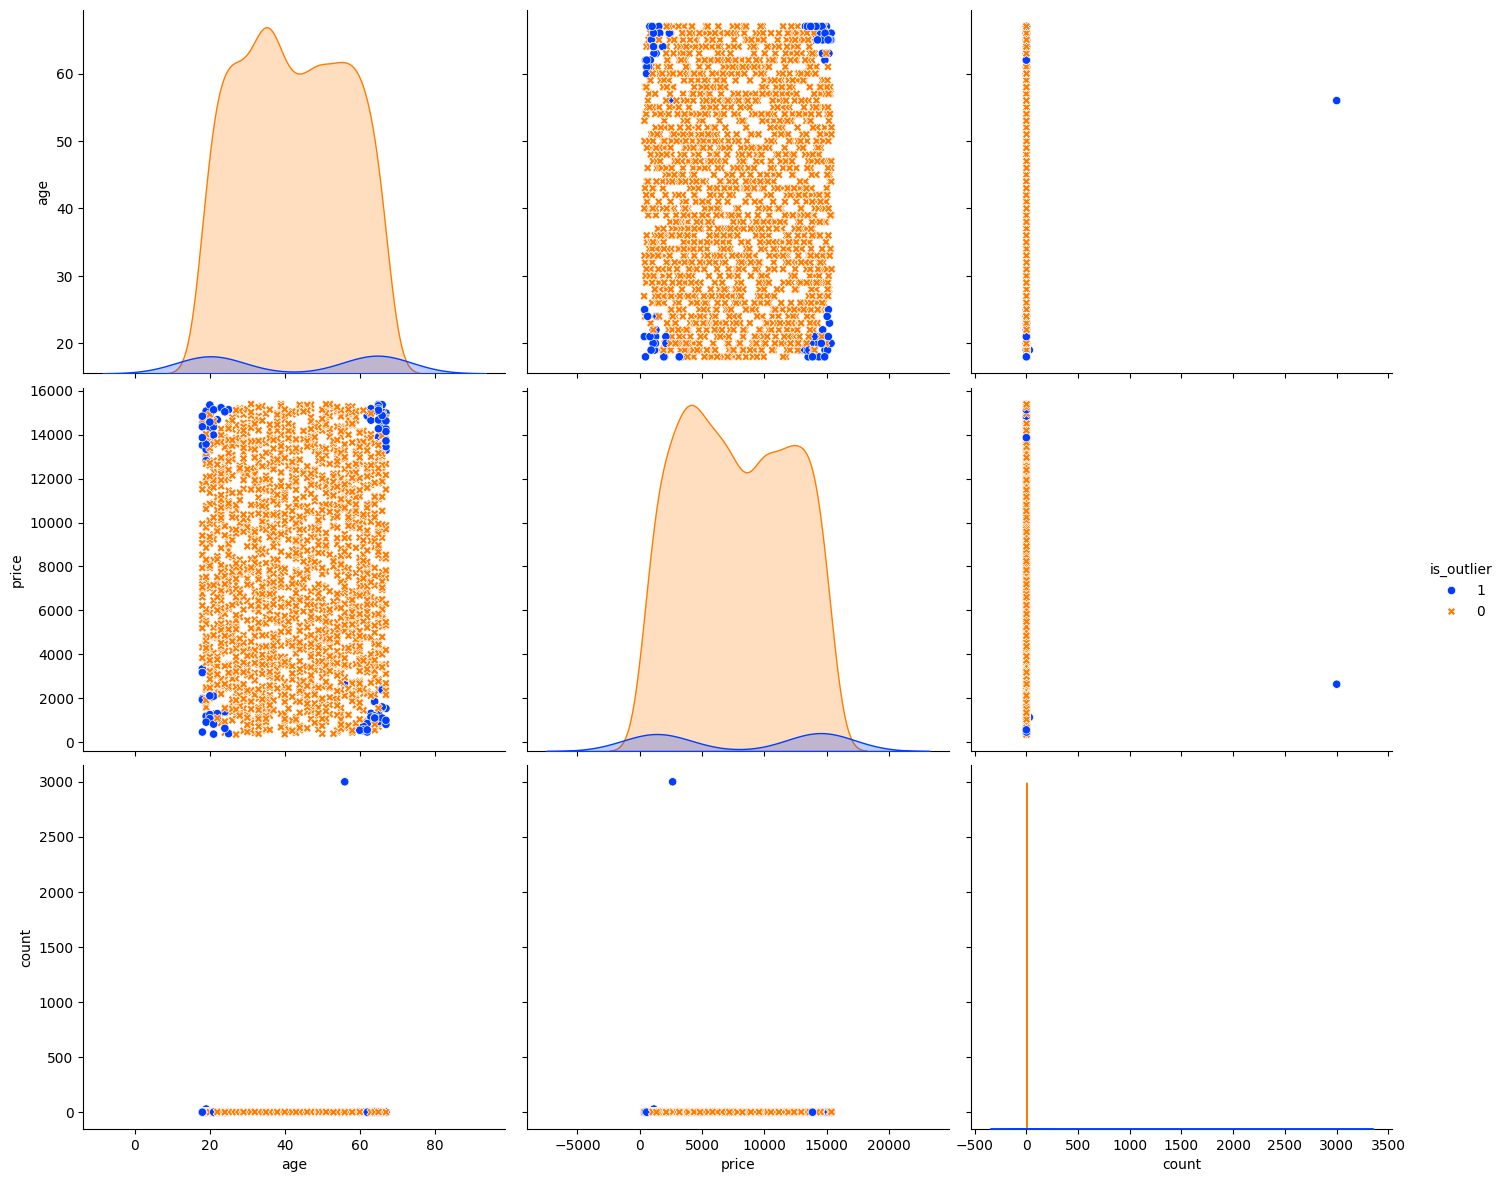

In [ ]:
# Map method names to lists of anomaly indices
anomaly_indices = {
    'std': anomaly_indices_std,
    'iqr': anomaly_indices_iqr,
    'distance-based, euclidean': anomaly_indices_euclidean,
    'distance-based, cityblock': anomaly_indices_cityblock,
    'dbscan': anomaly_indices_dbscan,
    'oneclass_svm': anomaly_indices_oneclass_svm,
    'isolation_forest': anomaly_indices_isolation_forest
}

# Get the list of indices corresponding to the outliers identified by the method with the closest to average detected anomalies
outlier_indices = np.intersect1d(anomaly_indices[closest_anomalies], X.select_dtypes(include=['int64', 'float64']).index)

# Extract the outliers from the original dataset
closest_outliers = X.select_dtypes(include=['int64', 'float64']).loc[outlier_indices]

labeled_data = X.select_dtypes(include=['int64', 'float64']).copy()
labeled_data['is_outlier'] = np.where(labeled_data.index.isin(outlier_indices), 1, 0)

sns.pairplot(data=labeled_data, vars=X.select_dtypes(include=['int64', 'float64']).columns,
             hue='is_outlier', hue_order=[1, 0],
             markers=['X', 'o'], palette='bright', height=4, aspect=1.2)
plt.show()